# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load Dataset 

In [3]:
file_path = r"C:\Users\nidhi\OneDrive\Desktop\SMS_Spam_Detection\data\spam.csv"

data = pd.read_csv(file_path, encoding="latin1")

# Keep only required columns
data = data[['label', 'message']]

data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
print("Dataset Shape:", data.shape)
print("\nClass Distribution:\n")
print(data['label'].value_counts())
print("\nMissing Values:\n")
print(data.isnull().sum())

Dataset Shape: (5572, 2)

Class Distribution:

label
ham     4825
spam     747
Name: count, dtype: int64

Missing Values:

label      0
message    0
dtype: int64


# Class Distribution Plot 

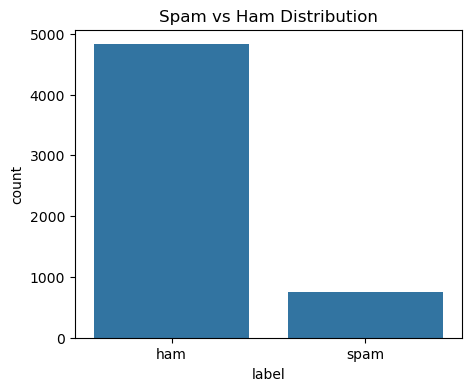

In [5]:
plt.figure(figsize=(5,4))
sns.countplot(x='label', data=data)
plt.title("Spam vs Ham Distribution")
plt.show()

# Feature Engineering 

In [6]:
data['num_characters'] = data['message'].apply(len)
data['num_words'] = data['message'].apply(lambda x: len(x.split()))
data['num_digits'] = data['message'].apply(lambda x: sum(c.isdigit() for c in x))
data['num_uppercase'] = data['message'].apply(lambda x: sum(c.isupper() for c in x))

data.head()

,label,message,num_characters,num_words,num_digits,num_uppercase
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,0,3
1,ham,Ok lar... Joking wif u oni...,29,6,0,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,25,10
3,ham,U dun say so early hor... U c already then say...,49,11,0,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,0,2


Observation: - Additional numerical features were created based on domain understanding.
             - Spam messages often contain more characters, digits, and uppercase letters.
             - These features can help the model capture patterns beyond textual content.

# Length Distribution

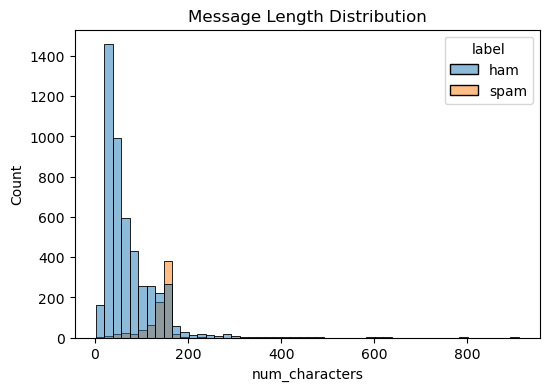

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(data=data, x='num_characters', hue='label', bins=50)
plt.title("Message Length Distribution")
plt.show()

# Text Cleaning

In [9]:
def clean_text(text):
    text = text.lower()
    text = ''.join(c for c in text if c not in string.punctuation)
    words = text.split()
    words = [w for w in words if w not in stopwords.words('english')]
    return ' '.join(words)

data['cleaned_message'] = data['message'].apply(clean_text)

data.head()

,label,message,num_characters,num_words,num_digits,num_uppercase,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,0,3,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,6,0,2,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,25,10,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,11,0,2,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,0,2,nah dont think goes usf lives around though


# Encode Labels

In [10]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

data.head()

,label,message,num_characters,num_words,num_digits,num_uppercase,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",111,20,0,3,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,6,0,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,25,10,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,11,0,2,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,2,nah dont think goes usf lives around though


# Save Cleaned Dataset

In [11]:
save_path = r"C:\Users\nidhi\OneDrive\Desktop\SMS_Spam_Detection\data\cleaned_spam.csv"

data.to_csv(save_path, index=False)

print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.
